## Project 2 Starting Over
Jacob Minkin
Last project I tried to predict a critical violation from location and cuisine. The problem is that almost all restaurants have at least one critical violation which made it hard to get any predictive value from the model. Now I want to try again with predicting the score and therefore grade of the restaurant

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from sklearn.impute import KNNImputer
sns.set_style('darkgrid')

#Import Data
df = pd.read_csv('../data/Inspection.csv')
df['date'] = pd.to_datetime(df['INSPECTION DATE'])
df = df[df.BORO == 'Manhattan']

## Find most recent score for every restaurant

In [4]:
df.sort_values(['date'], ascending=False, inplace= True)
df_recent = df.groupby(['CAMIS'], sort=False).first()

In [6]:
df_recent.DBA.value_counts().head(35)

STARBUCKS                             146
DUNKIN                                102
SUBWAY                                 61
CHIPOTLE MEXICAN GRILL                 50
MCDONALD'S                             41
PRET A MANGER                          39
LE PAIN QUOTIDIEN                      32
SWEETGREEN                             29
JUST SALAD                             25
TACO BELL                              19
POPEYES                                18
STARBUCKS COFFEE                       17
CHOP'T                                 17
JOE & THE JUICE                        17
BLUESTONE LANE                         16
DUNKIN'                                16
DOMINO'S                               16
BLUE BOTTLE COFFEE                     15
MAMAN                                  15
SHAKE SHACK                            15
LITTLE ITALY PIZZA                     15
DOS TOROS                              14
JUICE GENERATION                       14
INSOMNIA COOKIES                  

In [69]:
df.DBA.value_counts().head(35)

STARBUCKS                 739
DUNKIN                    675
SUBWAY                    548
CHIPOTLE MEXICAN GRILL    290
MCDONALD'S                248
JOE & THE JUICE           244
BLUESTONE LANE            198
LE PAIN QUOTIDIEN         191
SWEETGREEN                189
PRET A MANGER             173
JUST SALAD                148
MAMAN                     140
DOMINO'S                  128
CHOP'T                    114
787 COFFEE                107
GREGORYS COFFEE           102
INSOMNIA COOKIES          101
LITTLE ITALY PIZZA         97
PARIS BAGUETTE             97
THINK COFFEE               97
STARBUCKS COFFEE           95
SHAKE SHACK                89
POPEYES                    89
DUNKIN'                    85
VAN LEEUWEN ICE CREAM      84
BURGER KING                82
DIG INN                    80
TACO BELL                  78
LENWICH                    77
VIVI BUBBLE TEA            75
CHIRPING CHICKEN           74
BAREBURGER                 72
JUICE PRESS                70
GO GO CURR

<AxesSubplot:>

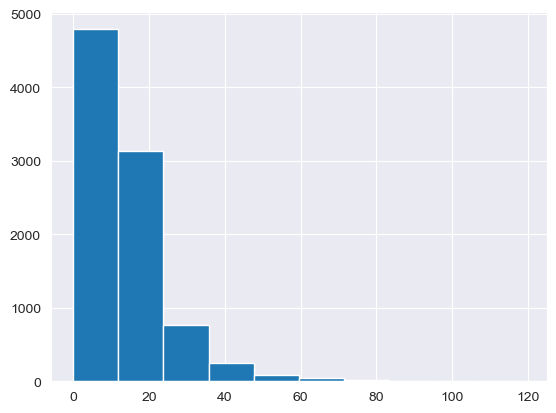

In [5]:
df_recent.SCORE.hist()


In [6]:
df_recent[df_recent.ACTION == 'No violations were recorded at the time of this inspection.']

,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE,INSPECTION DATE,ACTION,VIOLATION CODE,...,BIN,BBL,NTA,Location Point,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,date
CAMIS,,,,,,,,,,,,,,,,,,,,,
41267566,SMITH & MILLS,Manhattan,71,NORTH MOORE STREET,10013.0,2122262515,American,2/9/2023,No violations were recorded at the time of thi...,None,...,1002123.0,1.001880e+09,MN24,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-09
50111280,PLANTSHED COFFEE BAR,Manhattan,723,AMSTERDAM AVENUE,10025.0,2126624400,Coffee/Tea,2/9/2023,No violations were recorded at the time of thi...,04H,...,1032587.0,1.012268e+09,MN12,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-09
40535738,NEIL SIMON THEATRE,Manhattan,250,WEST 52 STREET,10019.0,2123544624,American,2/8/2023,No violations were recorded at the time of thi...,None,...,1024820.0,1.010230e+09,MN17,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-08
41531136,AUGUST WILSON THEATRE,Manhattan,245,WEST 52 STREET,10019.0,2125825472,American,2/1/2023,No violations were recorded at the time of thi...,None,...,1024826.0,1.010240e+09,MN17,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-01
50125715,TACO BELL,Manhattan,18,EAST 14 STREET,10003.0,6095866680,Mexican,1/23/2023,No violations were recorded at the time of thi...,28-03,...,1009392.0,1.005710e+09,MN23,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50044589,BAR AT THE GARDEN,Manhattan,4,PENN PLZ,10121.0,2124656273,American,5/30/2019,No violations were recorded at the time of thi...,06D,...,1082908.0,1.007810e+09,MN17,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-30
50044522,CLUB GRILL,Manhattan,4,PENN PLZ,10121.0,2124656273,American,5/30/2019,No violations were recorded at the time of thi...,02B,...,1082908.0,1.007810e+09,MN17,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-30
50045112,GARDEN PUB,Manhattan,4,PENN PLZ,10121.0,2124656302,American,5/30/2019,No violations were recorded at the time of thi...,10F,...,1082908.0,1.007810e+09,MN17,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-30


In [7]:
df[['CAMIS','GRADE','SCORE', 'date']].loc[df.DBA == 'LA PIZZA & CONVENIENCE']

,CAMIS,GRADE,SCORE,date


In [8]:
df_recent[['GRADE','SCORE', 'date']].loc[df_recent.DBA == 'LA PIZZA & CONVENIENCE']

,GRADE,SCORE,date
CAMIS,,,


In [9]:
df_recent.DBA[df_recent.GRADE.isna()]

CAMIS
50117520                       MALA HOUSE
50107638    TERRIFIC WINGS TACOS & THINGS
50119364                             None
50128995                    PEAKY BARISTA
50131336               LITTLE ITALY PIZZA
                        ...              
50130678                     CASA TOSCANA
50124010                             None
50129856                       FIVE ACRES
50129286           SOPHIE'S CUBAN CUISINE
50107551                           Zazzys
Name: DBA, Length: 1741, dtype: object

In [10]:
df_unranked = df[df['INSPECTION DATE'] == '1/1/1900']

In [11]:
df_recent = df_recent[df_recent['INSPECTION DATE'] != '1/1/1900']

<AxesSubplot:>

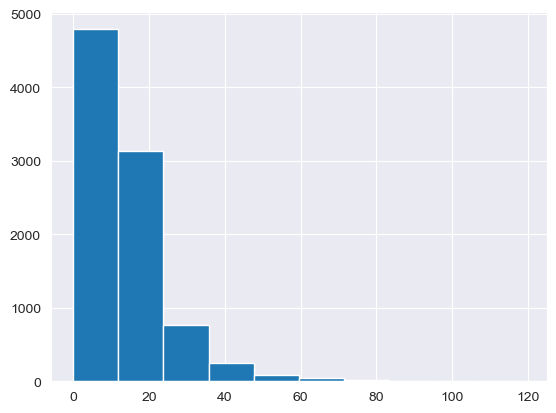

In [12]:
df_recent.SCORE.hist()

## Average Score for Boro

In [13]:
df_recent.groupby('BORO')['SCORE'].mean()

BORO
Manhattan    12.94924
Name: SCORE, dtype: float64

In [14]:
df_recent.BORO.sort_values()

CAMIS
50114345    Manhattan
41543826    Manhattan
41460700    Manhattan
40668464    Manhattan
50073606    Manhattan
              ...    
50120540    Manhattan
50107980    Manhattan
50075419    Manhattan
41642422    Manhattan
50043445    Manhattan
Name: BORO, Length: 9083, dtype: object

In [15]:
df[df.BORO == '0']

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE,INSPECTION DATE,ACTION,...,BIN,BBL,NTA,Location Point,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,date


## Finding a resteraunt as a proxy for exploratory analysis

In [16]:
STARBUCKS = df_recent['DBA'].str.contains('STARBUCKS', regex=False, na=False)
STARBUCKS = df_recent[STARBUCKS]
Sbucks = df_recent[df_recent.DBA == "Starbucks"]
STARBUCKS = pd.concat([STARBUCKS, Sbucks])
STARBUCKS.CUISINE.value_counts()

Coffee/Tea    190
Name: CUISINE, dtype: int64

<AxesSubplot:>

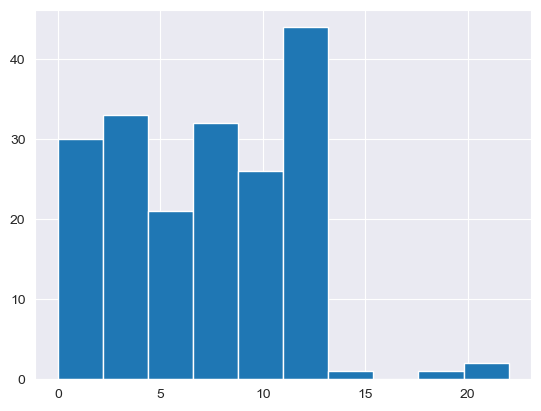

In [17]:
STARBUCKS.SCORE.hist()

In [18]:
Dunkin = df_recent['DBA'].str.contains('DUNKIN', regex=False, na=False)
Dunkin = df_recent[Dunkin]
#Dbucks = df[df.DBA == "Dunkin"]
#STARBUCKS = pd.concat([STARBUCKS, Sbucks])
Dunkin.SCORE.median()


10.0

In [22]:
SUBWAY = df_recent['DBA'].str.contains("SUBWAY", regex=False, na=False)
SUBWAY = df_recent[SUBWAY]
#Dbucks = df[df.DBA == "Dunkin"]
#STARBUCKS = pd.concat([STARBUCKS, Sbucks])
SUBWAY.SCORE.mean()

SUBWAY['Dif_Score'] = abs( SUBWAY.SCORE - SUBWAY.SCORE.mean())

C:\Users\logic_switch\AppData\Local\Temp\ipykernel_12936\1708942729.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SUBWAY['Dif_Score'] = abs( SUBWAY.SCORE - SUBWAY.SCORE.mean())


In [23]:
SUBWAY['Dif_Score']

CAMIS
50038538    7.096774
41501681    2.096774
41559193    7.096774
50012125    1.903226
50045121    8.096774
              ...   
41374594    0.096774
50002228    0.096774
41272215    0.903226
50007472    0.903226
50040782    9.903226
Name: Dif_Score, Length: 62, dtype: float64

## Breakdown of score by cuisine

In [33]:
df_recent.groupby('CUISINE')['SCORE'].mean().sort_values(ascending=False).head(15)


CUISINE
New French           40.000000
Californian          23.500000
English              20.888889
Pancakes/Waffles     19.600000
Chinese/Japanese     19.250000
Southeast Asian      18.343750
Moroccan             18.250000
Basque               18.000000
Fruits/Vegetables    17.666667
African              17.650000
Indian               17.236220
Latin American       17.155280
Russian              17.000000
Vegan                16.945946
Peruvian             16.866667
Name: SCORE, dtype: float64

## Its Starbucks Time!!

In [34]:
STARBUCKS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 50108947 to 50123623
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DBA                     190 non-null    object        
 1   BORO                    190 non-null    object        
 2   BUILDING                190 non-null    object        
 3   STREET                  190 non-null    object        
 4   ZIPCODE                 187 non-null    float64       
 5   PHONE                   190 non-null    object        
 6   CUISINE                 190 non-null    object        
 7   INSPECTION DATE         190 non-null    object        
 8   ACTION                  190 non-null    object        
 9   VIOLATION CODE          190 non-null    object        
 10  VIOLATION               190 non-null    object        
 11  CRITICAL FLAG           190 non-null    object        
 12  SCORE                   190 non-null  

<AxesSubplot:>

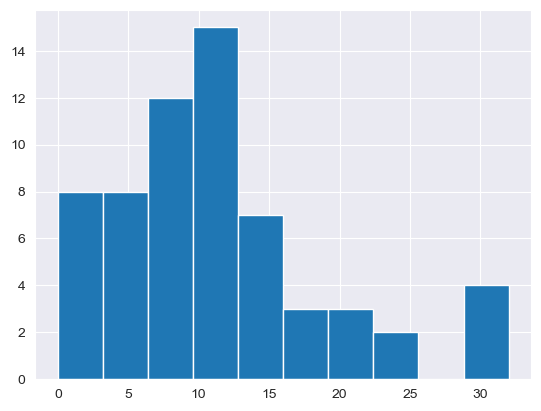

In [35]:
SUBWAY.SCORE.hist()

In [19]:
df_recent.groupby('CUISINE')['SCORE'].mean().sort_values(ascending=False).head(15)

CUISINE
New French           40.000000
Californian          23.500000
English              20.888889
Pancakes/Waffles     19.600000
Chinese/Japanese     19.250000
Southeast Asian      18.343750
Moroccan             18.250000
Basque               18.000000
Fruits/Vegetables    17.666667
African              17.650000
Indian               17.236220
Latin American       17.155280
Russian              17.000000
Vegan                16.945946
Peruvian             16.866667
Name: SCORE, dtype: float64

In [47]:
print(df_recent[df_recent.CUISINE == 'Chinese/Japanese'].SCORE.mean())
print(df_recent[df_recent.CUISINE == 'Chinese/Japanese'].SCORE.std())

19.25
17.043082663258623


In [48]:
print(df_recent[df_recent.CUISINE == 'Chinese'].SCORE.mean())
print(df_recent[df_recent.CUISINE == 'Chinese'].SCORE.std())

16.369515011547342
13.234956309495013


In [49]:
print(df_recent[df_recent.CUISINE == 'Japanese'].SCORE.mean())
print(df_recent[df_recent.CUISINE == 'Japanese'].SCORE.std())

14.168181818181818
11.347237784708726


In [54]:
print(df_recent[df_recent.CUISINE == 'Italian'].SCORE.mean())
print(df_recent[df_recent.CUISINE == 'Italian'].SCORE.std())

13.273076923076923
10.661477218815802


In [58]:
print(df_recent[df_recent.CUISINE == 'Pancakes/Waffles'].SCORE.mean())
print(df_recent[df_recent.CUISINE == 'Pancakes/Waffles'].SCORE.std())


19.6
16.80178561939177


In [68]:
print(df_recent[df_recent.CUISINE == 'Mexican'].value_counts())
print(df_recent[df_recent.CUISINE == 'Mexican'].SCORE.mean())
print(df_recent[df_recent.CUISINE == 'Mexican'].SCORE.std())

Series([], dtype: int64)
14.708502024291498
12.491787895258138


In [59]:
df_recent[df_recent.CUISINE== 'Pancakes/Waffles'].DBA.value_counts()

IHOP               2
WAFELS & DINGES    2
UPTOWN CREPES      1
Name: DBA, dtype: int64

In [93]:
print(df_recent[df_recent.CUISINE == 'Coffee/Tea'].count())
print(df_recent[df_recent.CUISINE == 'Coffee/Tea'].SCORE.mean())
print(df_recent[df_recent.CUISINE == 'Coffee/Tea'].SCORE.std())

DBA                       863
BORO                      863
BUILDING                  862
STREET                    863
ZIPCODE                   855
PHONE                     863
CUISINE                   863
INSPECTION DATE           863
ACTION                    863
VIOLATION CODE            863
VIOLATION                 863
CRITICAL FLAG             863
SCORE                     863
GRADE                     863
GRADE DATE                823
RECORD DATE               863
INSPECTION TYPE           863
Latitude                  861
Longitude                 861
Community Board           849
Council District          849
Census Tract              849
BIN                       838
BBL                       857
NTA                       849
Location Point              0
Zip Codes                   0
Community Districts         0
Borough Boundaries          0
City Council Districts      0
Police Precincts            0
date                      863
dtype: int64
10.293163383545771
8.921859

In [73]:
print(df_recent[df_recent.CUISINE == 'Pizza'].DBA.count())
print(df_recent[df_recent.CUISINE == 'Pizza'].SCORE.mean())
print(df_recent[df_recent.CUISINE == 'Pizza'].SCORE.std())

415
14.250602409638555
10.993183807065924


In [70]:
LIpizza = df_recent['DBA'].str.contains("LITTLE ITALY PIZZA", regex=False, na=False)
LIpizza = df_recent[MCDONALD]

print(LIpizza.SCORE.mean())
print(LIpizza.SCORE.std())


11.785714285714286
8.684013352827593


In [91]:
MCDONALD = df_recent['DBA'].str.contains("MCDONALD'S", regex=False, na=False)
MCDONALD = df_recent[MCDONALD]

print(MCDONALD.SCORE.mean())
print(MCDONALD.SCORE.std())
MCDONALD.sort_values('SCORE', ascending= False)

8.71111111111111
4.170361997707057


,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE,INSPECTION DATE,ACTION,VIOLATION CODE,...,BIN,BBL,NTA,Location Point,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,date
CAMIS,,,,,,,,,,,,,,,,,,,,,
50045348,MCDONALD'S,Manhattan,1499,3 AVENUE,10028.0,2126288100,Hamburgers,1/12/2023,Violations were cited in the following area(s).,06D,...,1048759.0,1.015300e+09,MN32,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-12
41241639,MCDONALD'S,Manhattan,3549,BROADWAY,10031.0,2124916860,Hamburgers,8/1/2022,Violations were cited in the following area(s).,10F,...,1062380.0,1.020920e+09,MN04,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-01
50118148,MCDONALD'S,Manhattan,556,7 AVENUE,10018.0,6318581111,Hamburgers,7/5/2022,Violations were cited in the following area(s).,04N,...,1014503.0,1.007890e+09,MN17,NaN,NaN,NaN,NaN,NaN,NaN,2022-07-05
50040867,MCDONALD'S,Manhattan,946,8 AVENUE,10019.0,2125866676,Hamburgers,2/6/2023,Violations were cited in the following area(s).,10F,...,1024886.0,1.010270e+09,MN17,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-06
50070066,MCDONALD'S,Manhattan,966,3 AVENUE,10022.0,2127535360,Hamburgers,3/24/2022,Violations were cited in the following area(s).,10F,...,1036913.0,1.013120e+09,MN19,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-24
50010393,MCDONALD'S,Manhattan,608,WEST 207 STREET,10034.0,2123043611,Hamburgers,5/5/2022,Violations were cited in the following area(s).,08A,...,1082051.0,1.022350e+09,MN01,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-05
40548768,MCDONALD'S,Manhattan,4259,BROADWAY,10033.0,9175210827,Hamburgers,7/15/2022,Violations were cited in the following area(s).,06D,...,1064280.0,1.021760e+09,MN36,NaN,NaN,NaN,NaN,NaN,NaN,2022-07-15
50001148,MCDONALD'S,Manhattan,148,WEST 125 STREET,10027.0,6469983697,Hamburgers,3/14/2022,Violations were cited in the following area(s).,10B,...,1057835.0,1.019090e+09,MN11,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-14
50045349,MCDONALD'S,Manhattan,18,EAST 42 STREET,10017.0,2125992127,Hamburgers,3/21/2022,Violations were cited in the following area(s).,02G,...,1035341.0,1.012760e+09,MN20,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-21


11.096774193548388
7.396742032967889


<AxesSubplot:>

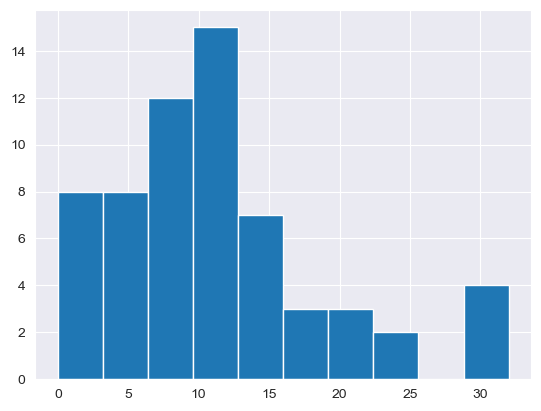

In [81]:
SUBWAY = df_recent['DBA'].str.contains('SUBWAY', regex=False, na=False)
SUBWAY = df_recent[SUBWAY]

print(SUBWAY.SCORE.mean())
print(SUBWAY.SCORE.std())
SUBWAY.SCORE.hist()

7.1421052631578945
4.190669377334712


<AxesSubplot:>

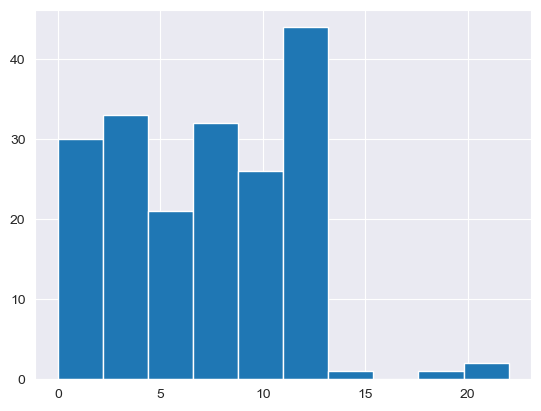

In [80]:
STARBUCKS = df_recent['DBA'].str.contains('STARBUCKS', regex=False, na=False)
STARBUCKS = df_recent[STARBUCKS]
Sbucks = df_recent[df_recent.DBA == "Starbucks"]
STARBUCKS = pd.concat([STARBUCKS, Sbucks])
STARBUCKS.CUISINE.value_counts()

print(STARBUCKS.SCORE.mean())
print(STARBUCKS.SCORE.std())
STARBUCKS.SCORE.hist()

In [64]:

DUNKIN = df_recent['DBA'].str.contains('DUNKIN', regex=False, na=False)
DUNKIN = df_recent[DUNKIN]

print(DUNKIN.SCORE.mean())
print(DUNKIN.SCORE.std())

9.320754716981131
5.33120827817469


In [74]:
CHIPOTLE = df_recent['DBA'].str.contains('CHIPOTLE', regex=False, na=False)
CHIPOTLE = df_recent[CHIPOTLE]

print(CHIPOTLE.SCORE.mean())
print(CHIPOTLE.SCORE.std())

8.055555555555555
5.845225972250062


In [77]:
TBell = df_recent['DBA'].str.contains('TACO BELL', regex=False, na=False)
TBell = df_recent[TBell]

print(TBell.SCORE.mean())
print(TBell.SCORE.std())

10.12
7.344612537999084


In [79]:
TBell = df_recent['DBA'].str.contains('AMC THEATRES', regex=False, na=False)
TBell = df_recent[TBell]

print(TBell.SCORE.mean())
print(TBell.SCORE.std())

9.272727272727273
3.926599268856171


In [ ]:
df.CUISINE

In [38]:
df_recent.SCORE.mean
df_recent.SCORE.std()

10.743485769694114

In [20]:
df_recent.CUISINE.value_counts()

American        2336
Coffee/Tea       863
Italian          520
Japanese         440
Chinese          433
                ... 
Bangladeshi        2
Creole/Cajun       2
Basque             1
Iranian            1
New French         1
Name: CUISINE, Length: 83, dtype: int64

In [35]:
df_re

Series([], Name: date, dtype: datetime64[ns])

False    10821
True         3
Name: DBA, dtype: int64

## Regression for Starbucks from Longitude and Latitude

In [184]:
STARBUCKS = df_recent['DBA'].str.contains('STARBUCKS', regex=False, na=False)
STARBUCKS = df_recent[STARBUCKS]
Sbucks = df_recent[df_recent.DBA == "Starbucks"]
STARBUCKS = pd.concat([STARBUCKS, Sbucks])
STARBUCKS = STARBUCKS.loc[(STARBUCKS.SCORE.notnull()) & (STARBUCKS.Longitude != 0) & (STARBUCKS.Latitude != 0)]
STARBUCKS.CUISINE.value_counts()
STARBUCKS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 50108947 to 50123623
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DBA                     187 non-null    object        
 1   BORO                    187 non-null    object        
 2   BUILDING                187 non-null    object        
 3   STREET                  187 non-null    object        
 4   ZIPCODE                 187 non-null    float64       
 5   PHONE                   187 non-null    object        
 6   CUISINE                 187 non-null    object        
 7   INSPECTION DATE         187 non-null    object        
 8   ACTION                  187 non-null    object        
 9   VIOLATION CODE          187 non-null    object        
 10  VIOLATION               187 non-null    object        
 11  CRITICAL FLAG           187 non-null    object        
 12  SCORE                   187 non-null  

In [185]:
STARBUCKS.loc[STARBUCKS['Community Board'].isnull(), 'Community Board'] = 105


In [186]:
STARBUCKS['long_lat'] = STARBUCKS.Longitude * STARBUCKS.Latitude

long_lat = ['Longitude','Latitude', 'long_lat', 'ZIPCODE', 'Community Board']
X_STARBUCKS =np.array( STARBUCKS[long_lat])
y_STARBUCKS =np.array( STARBUCKS.SCORE)

In [165]:
MCDONALD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 41578619 to 41275238
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DBA                     45 non-null     object        
 1   BORO                    45 non-null     object        
 2   BUILDING                45 non-null     object        
 3   STREET                  45 non-null     object        
 4   ZIPCODE                 44 non-null     float64       
 5   PHONE                   45 non-null     object        
 6   CUISINE                 45 non-null     object        
 7   INSPECTION DATE         45 non-null     object        
 8   ACTION                  45 non-null     object        
 9   VIOLATION CODE          45 non-null     object        
 10  VIOLATION               45 non-null     object        
 11  CRITICAL FLAG           45 non-null     object        
 12  SCORE                   45 non-null    

In [166]:
MCDONALD['long_lat'] = MCDONALD.Longitude * MCDONALD.Latitude

long_lat = ['Longitude','Latitude', 'long_lat']
X_MCDONALD =np.array( MCDONALD[long_lat])
y_MCDONALD =np.array( MCDONALD.SCORE)

C:\Users\logic_switch\AppData\Local\Temp\ipykernel_16736\3237225372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MCDONALD['long_lat'] = MCDONALD.Longitude * MCDONALD.Latitude


In [170]:
SUBWAY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 50038538 to 50131306
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DBA                     67 non-null     object        
 1   BORO                    67 non-null     object        
 2   BUILDING                67 non-null     object        
 3   STREET                  67 non-null     object        
 4   ZIPCODE                 66 non-null     float64       
 5   PHONE                   67 non-null     object        
 6   CUISINE                 62 non-null     object        
 7   INSPECTION DATE         67 non-null     object        
 8   ACTION                  62 non-null     object        
 9   VIOLATION CODE          62 non-null     object        
 10  VIOLATION               62 non-null     object        
 11  CRITICAL FLAG           67 non-null     object        
 12  SCORE                   62 non-null    

In [171]:
SUBWAY = SUBWAY.loc[(SUBWAY.SCORE.notnull())]
SUBWAY['long_lat'] = SUBWAY.Longitude * SUBWAY.Latitude

long_lat = ['Longitude','Latitude', 'long_lat']
X_SUBWAY =np.array( SUBWAY[long_lat])
y_SUBWAY =np.array( SUBWAY.SCORE)

In [188]:
from sklearn.linear_model import LinearRegression

linmod = LinearRegression()

linmod.fit(y =y_STARBUCKS, X=X_STARBUCKS)

# Calculate Accuracy
accuracy = linmod.score(X= X_STARBUCKS, y = y_STARBUCKS)
print(f"Model accuracy: {accuracy}")

# Look at betas (coefficients)
betas = linmod.coef_
print(f"Betas: {betas}")

Model accuracy: 0.013347053669328424
Betas: [-1.36779837e+04  2.47600228e+04  3.34830178e+02  8.49278140e-03
  3.63006307e-01]


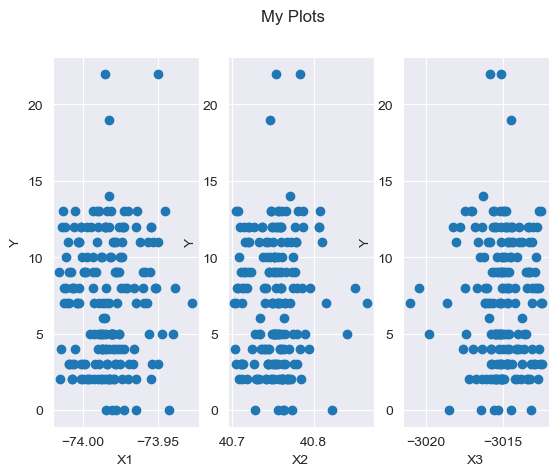

In [134]:
# Extract the x and y coordinates
x1 = X[:, 0]
x2 = X[:, 1]
x3 = X[:, 2]
x1
# Create a figure with three subplots
fig, axs = plt.subplots(1, 3)

# Plot X1 vs y
axs[0].scatter(X[:, 0], y)
axs[0].set_xlabel("X1")
axs[0].set_ylabel("Y")

# Plot X2 vs y
axs[1].scatter(X[:, 1], y)
axs[1].set_xlabel("X2")
axs[1].set_ylabel("Y")

# Plot X3 vs y
axs[2].scatter(X[:, 2], y)
axs[2].set_xlabel("X3")
axs[2].set_ylabel("Y")

# Add a title to the figure
fig.suptitle("My Plots")

# Show the plots
plt.show()